# Z Distribution and Z-tests

## Z-tests
A z-test is a statistical method used to determine if there is a significant difference between sample data and a **known population parameter**, or between two sample means when the **population variance is known or the sample size is large**. 

Assumptions of a Z-Test:
- Normality: The data should be approximately normally distributed. This is usually satisfied if the sample size is large $n \geq 30$ due to the Central Limit Theorem.
- Known Population Variance: For a z-test, the population standard deviation $\sigma$ is assumed to be known. If it's unknown, a t-test is typically used instead.
- Independent Observations: The samples should be independent of each other.

## Calculate the Test Statistic:
The test statistic $ z $ is calculated using:

$$
z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}
$$

Where:
- $ \bar{X} $ is the sample mean.
- $ \mu_0 $ is the population mean under the null hypothesis.
- $ \sigma $ is the population standard deviation.
- $ n $ is the sample size.

## Determine the Critical Value and Significance Level
- Choose a significance level $ \alpha $, commonly set at 0.05 or 0.01.
- Determine the critical value from the standard normal distribution for a one-tailed or two-tailed test.

### One-Sided Test
**$ \alpha = 0.05 $**:
- Right-tailed critical value: $ z_{0.05} \approx 1.645 $
- Left-tailed critical value: $ z_{0.05} \approx -1.645 $

**$ \alpha = 0.01 $**:
- Right-tailed critical value: $ z_{0.01} \approx 2.33 $
- Left-tailed critical value: $ z_{0.01} \approx -2.33 $

For a one-sided test with $\alpha = 0.05$, you find the z-value such that the area in the right tail is 0.05 is $\approx$ 1.645.
![oneside](../../../images/onesided.png)

### Two-Sided Test

**$ \alpha = 0.05 $**:
- Critical values for a two-sided test with $ \alpha = 0.05 $ means $ \alpha/2 = 0.025 $ in each tail:$ z_{0.025} \approx \pm 1.96 $

**$ \alpha = 0.01 $**:
- Critical values for a two-sided test with $ \alpha = 0.01 $ means $ \alpha/2 = 0.005 $ in each tail:$ z_{0.005} \approx \pm 2.58 $

For a two-sided test with $\alpha = 0.05$, you find the z-value such that the area in each tail is 0.025 is $\approx \pm$ 1.96
![oneside](../../../images/twosided.png) 

### Summary of Critical Values for Z-Distribution

| Significance Level ($\alpha$) | One-Sided Critical Value (Right Tail) | One-Sided Critical Value (Left Tail) | Two-Sided Critical Values |
|---------------------------------|---------------------------------------|--------------------------------------|---------------------------|
| $ \alpha = 0.05 $             | $ 1.645 $                           | $ -1.645 $                         | $ \pm 1.96 $            |
| $ \alpha = 0.01 $             | $ 2.33 $                            | $ -2.33 $                          | $ \pm 2.58 $            |

## P-value
### Understanding the P-Value
Instead of comparing the computed z-value to the critical value, it is also possible to directly calculate the probability of that value arising by chance if the $H_0$ is true.

The p-value is the probability of obtaining a test statistic at least as extreme as the one observed in your sample data, assuming that the null hypothesis is true. It quantifies the evidence against the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.

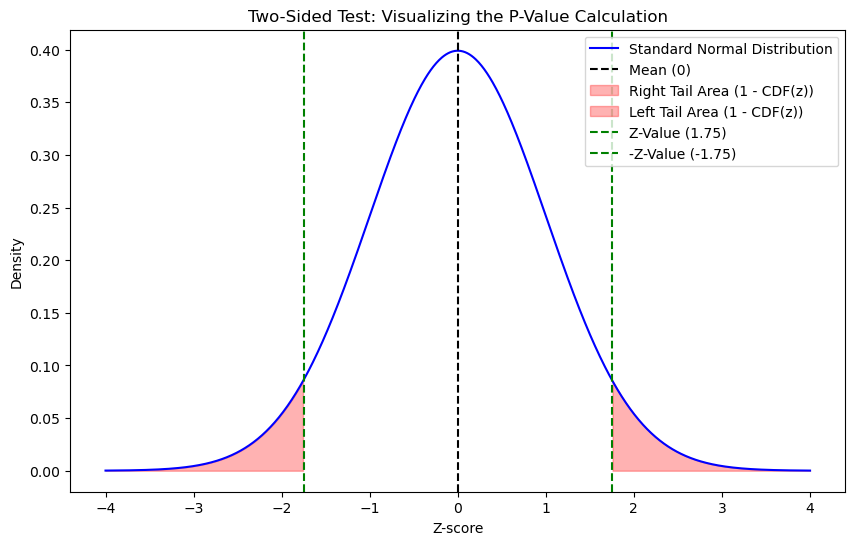

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the standard normal distribution function
def standard_normal_pdf(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

# Generate x values for the plot
x = np.linspace(-4, 4, 1000)
y = standard_normal_pdf(x)

# Given z-value for the two-sided test
z_value = 1.75

# Plot the standard normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution', color='blue')
plt.axvline(x=0, color='black', linestyle='--', label='Mean (0)')

# Right tail area for one-sided test
plt.fill_between(x, 0, y, where=(x >= z_value), color='red', alpha=0.3, label='Right Tail Area (1 - CDF(z))')

# Left tail area for two-sided test
plt.fill_between(x, 0, y, where=(x <= -z_value), color='red', alpha=0.3, label='Left Tail Area (1 - CDF(z))')

# Mark the z-value positions
plt.axvline(x=z_value, color='green', linestyle='--', label=f'Z-Value ({z_value})')
plt.axvline(x=-z_value, color='green', linestyle='--', label=f'-Z-Value (-{z_value})')

# Add labels and legend
plt.title('Two-Sided Test: Visualizing the P-Value Calculation')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.legend()
plt.show()


## Draw a Conclusion
There are two ways to reject the null hypothesis: using the critical values, or by calculating the p-value directly. They reach equivalent conclusions. 

Critical value method
- Compare the calculated $ z $-value to the critical value(s):
- If the $ z $-value falls in the rejection region (beyond the critical value), reject the null hypothesis.
- If the $ z $-value does not fall in the rejection region, fail to reject the null hypothesis.

P-value method 
- Compare the P-Value to the Significance Level $\alpha$. The significance level $\alpha$ is a threshold you set before conducting the test.
- If $\text{p-value} \leq \alpha$: There is enough evidence to reject the null hypothesis.
- If $\text{p-value} > \alpha$: There is insufficient evidence to reject the null hypothesis.

Statistically Significant: When the p-value is less than or equal to $\alpha$ the result is considered statistically significant or z is in the rejection region,  the observed effect is unlikely to have occurred by chance.


# Examples

## Example: Two sided Z-Test
Suppose you have a sample mean test score of $ \bar{X} = 85 $, with a known population mean of $ \mu_0 = 80 $ and a population standard deviation $ \sigma = 10 $. The sample size $ n = 30 $. 

1. Hypotheses: 
   - $ H_0: \mu = 80 $
   - $ H_1: \mu \neq 80 $

2. Calculate the z-Statistic:
$$
   z = \frac{85 - 80}{10 / \sqrt{30}} \approx 2.74
$$

3. Critical Value at $ \alpha = 0.05 $ (Two-Tailed):
   - Critical values are $ \pm 1.96 $.

4. Decision:
   - $ 2.74 $ is greater than $ 1.96 $, so we reject the null hypothesis.

5. Conclusion:
   - There is a statistically significant difference between the sample mean and the population mean at the 0.05 significance level.